In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

df = pd.read_csv('../dataset/games_march2025_clean.csv')

# Criação da coluna total_ratings
df['total_ratings'] = df['positive'] + df['negative']

# Garantir que release_date seja datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Criar a coluna 'semester' indicando o ano e se é 1º ou 2º semestre
df['semester'] = df['release_date'].dt.year.astype(str) + ' S' + df['release_date'].dt.month.apply(lambda x: '1' if x <= 6 else '2')


In [ ]:
# Preparar dados
top10_games = df.sort_values('total_ratings', ascending=False).head(10)

# Separar positivos e negativos
positives = top10_games['positive']
negatives = top10_games['negative']

# Criação do gráfico
fig, ax = plt.subplots(figsize=(12,7))

# Plotar as barras empilhadas
ax.barh(top10_games['name'], positives, label='Avaliações Positivas', color='#90ee90')
ax.barh(top10_games['name'], negatives, left=positives, label='Avaliações Negativas', color='#ff7f7f')

# Adicionar título e labels
ax.set_xlabel('Total de Avaliações')
ax.set_title('Top 10 Jogos Mais Avaliados (2021-2025) — Dividido entre Positivas e Negativas')

# Inverter y-axis (maior no topo)
ax.invert_yaxis()

# Formatar eixo X para "K"
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

# Adicionar legenda
ax.legend()

# Melhorar layout
plt.tight_layout()

plt.savefig('../análises/top10_mais_avaliados.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Filtrar apenas jogos pagos (preço > 0)
df_paid = df[df['price'] > 0]

plt.figure(figsize=(12,6))

# Plotar histograma com 30 bins
plt.hist(df_paid[df_paid['price'] <= 100]['price'], bins=30, color='#90caf9', edgecolor='black')

# Adicionar título e eixos
plt.title('Distribuição dos Preços dos Jogos Pagos (até $100) - (2021–2025)')
plt.xlabel('Preço ($)')
plt.ylabel('Quantidade de Jogos')

# Definir ticks do eixo X de 10 em 10
plt.xticks(range(0, 110, 10))

# Adicionar grid e ajustes
plt.grid(axis='y')
plt.tight_layout()

# Salvar o gráfico
plt.savefig('../análises/distribuicao_precos_jogos_pagos_ate_100.png', dpi=300)

# Mostrar
plt.show()



In [ ]:
# Limpar os colchetes e aspas
df['genres_clean'] = df['genres'].str.replace(r"[\[\]']", "", regex=True)

# Pegar o primeiro gênero (antes da vírgula)
df['primary_genre'] = df['genres_clean'].str.split(',').str[0]

# Excluir entradas vazias 
df = df[df['primary_genre'] != '']

top_genres = df['primary_genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='#a5d6a7', edgecolor='black')
plt.title('Top 10 Gêneros (2021–2025)')
plt.ylabel('Número de Jogos')
plt.xlabel('Gênero Principal')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../análises/top10_generos.png', dpi=300)
plt.show()



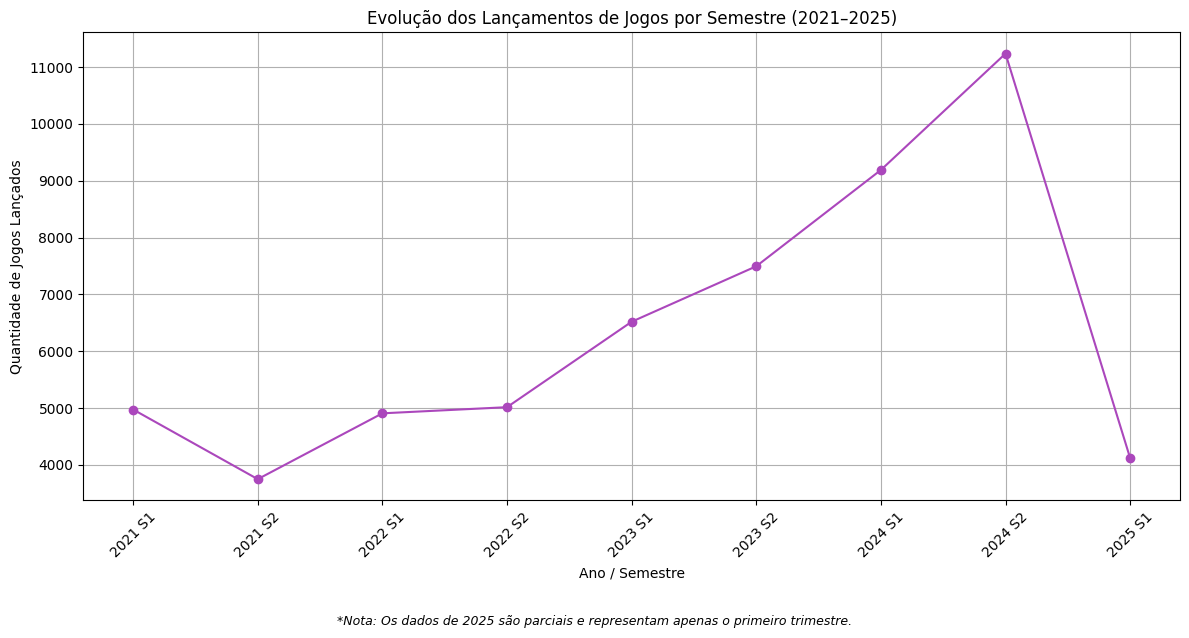

In [46]:
# Contar a quantidade de lançamentos por semestre
launches_per_semester = df['semester'].value_counts().sort_index()

plt.figure(figsize=(12,6))

# Plotar manualmente
plt.plot(launches_per_semester.index, launches_per_semester.values, marker='o', color='#ab47bc')

# Títulos e eixos
plt.title('Evolução dos Lançamentos de Jogos por Semestre (2021–2025)')
plt.xlabel('Ano / Semestre')
plt.ylabel('Quantidade de Jogos Lançados')
plt.xticks(rotation=45)
plt.grid()

# Adicionar um texto discreto abaixo
plt.figtext(0.5, -0.05, '*Nota: Os dados de 2025 são parciais e representam apenas o primeiro trimestre.', 
            ha='center', fontsize=9, style='italic')

plt.tight_layout()
plt.savefig('../análises/evolucao_lancamentos_semestre.png', dpi=300, bbox_inches='tight')
plt.show()

